In [12]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from systems.provided.example.simplesystem import simplesystem


data = csvFuturesSimData()
_tmp = simplesystem()
rawdata = _tmp.rawdata

2022-11-04 15:20:06 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-04 15:20:06 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-04 15:20:06 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-04 15:20:06 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-04 15:20:06 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-04 15:20:06 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-11-04 15:20:06 {'type': 'csvFutures

/Users/weiranzhou/miniconda3/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:969: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='vol', ylabel='next_month_return'>

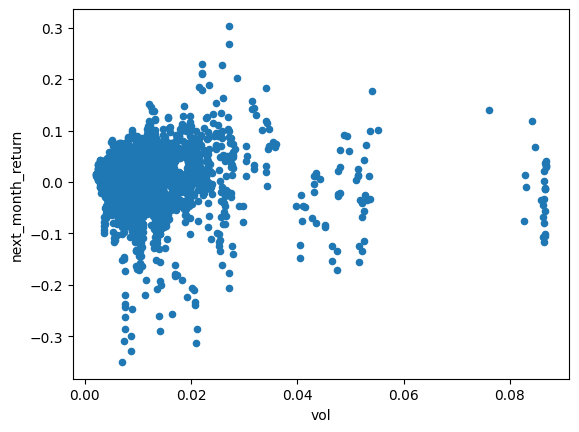

In [28]:
from sysquant.estimators.vol import simple_ewvol_calc
import pandas as pd

adjust_price  = data.daily_prices("SP500")
contract_price = rawdata.daily_denominator_price("SP500")
daily_returns = adjust_price.diff() / contract_price
vol = daily_returns.rolling(30).std().rename('vol')
next_month_return = ((adjust_price.shift(-21) - adjust_price) / contract_price).rename('next_month_return')
next_month_vol = daily_returns.shift(-21).rolling(21).std().rename('next_month_vol')

pd.concat([vol, next_month_return], axis=1).sort_values('vol').plot.scatter(x='vol', y='next_month_return')


In [39]:
import numpy as np

df = pd.concat([vol, next_month_vol], axis=1)
np.array_split(daily_returns, 5)[-1].tail(50)
# .plot.scatter(x='vol', y='next_month_vol')

index
2022-07-12   -0.010069
2022-07-13   -0.007244
2022-07-14    0.000000
2022-07-15    0.018297
2022-07-18   -0.007425
2022-07-19    0.027121
2022-07-20    0.002150
2022-07-21    0.009396
2022-07-22   -0.007065
2022-07-25   -0.000252
2022-07-26   -0.005839
2022-07-27    0.020209
2022-07-28    0.020585
2022-07-29    0.006655
2022-08-01   -0.002304
2022-08-02   -0.006530
2022-08-03    0.013546
2022-08-04   -0.000181
2022-08-05   -0.002414
2022-08-08    0.002168
2022-08-09   -0.005207
2022-08-10    0.019413
2022-08-11    0.001837
2022-08-12    0.014483
2022-08-15    0.003202
2022-08-16    0.003654
2022-08-17   -0.006891
2022-08-18    0.001749
2022-08-19   -0.014130
2022-08-22   -0.019776
2022-08-23   -0.004482
2022-08-24    0.005181
2022-08-25    0.010905
2022-08-26   -0.037722
2022-08-29   -0.001734
2022-08-30   -0.012354
2022-08-31   -0.006565
2022-09-01    0.001890
2022-09-02   -0.008800
2022-09-05         NaN
2022-09-06         NaN
2022-09-07    0.018016
2022-09-08    0.007512
2022-